In [63]:
%matplotlib inline
import math

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [96]:
def make_diagonal_matrix(N, max_eigen, stdev):
    A = np.zeros([N, N])
    for i in range(N):
        A[i, i] = np.random.normal(0, stdev)
    A[0, 0] = max_eigen
    return A

def make_random_direction(N):
    vec = np.random.rand(N)
    return vec / np.linalg.norm(vec)

def make_random_subspace(N, dims):
    basis = np.array([make_random_direction(N) for _ in range(dims)]).T
    Q, _ = np.linalg.qr(basis)
    return Q

def project(vec, A):
    b, _, _, _ = np.linalg.lstsq(A, vec, rcond=None)
    return A @ b

# x[t + 1] = Ax[t] + u[t]
def single_test(strategy, A, x, steps, dims=1):
    N = A.shape[0]
   
    states = [x]
    
    for _ in range(steps):
        transformed_x = A @ x
        random_span = make_random_subspace(N, dims)
        random_projection = project(transformed_x, random_span)
        u = strategy(random_projection)
        x = transformed_x + u
        states.append(x)
    
    return {"states": states}

def plot_magnitude_decay(**kwargs):
    for name, vecs in kwargs.items():
        vals = [np.linalg.norm(vec) for vec in vecs]
        plt.plot(range(len(vecs)), vals, label=name)
    plt.xlabel("steps")
    plt.ylabel("magnitudes")
    plt.yscale('log')
    plt.legend()


In [97]:
def greedy(vec):
    return -vec

def zero(vec):
    return np.zeros(len(vec))

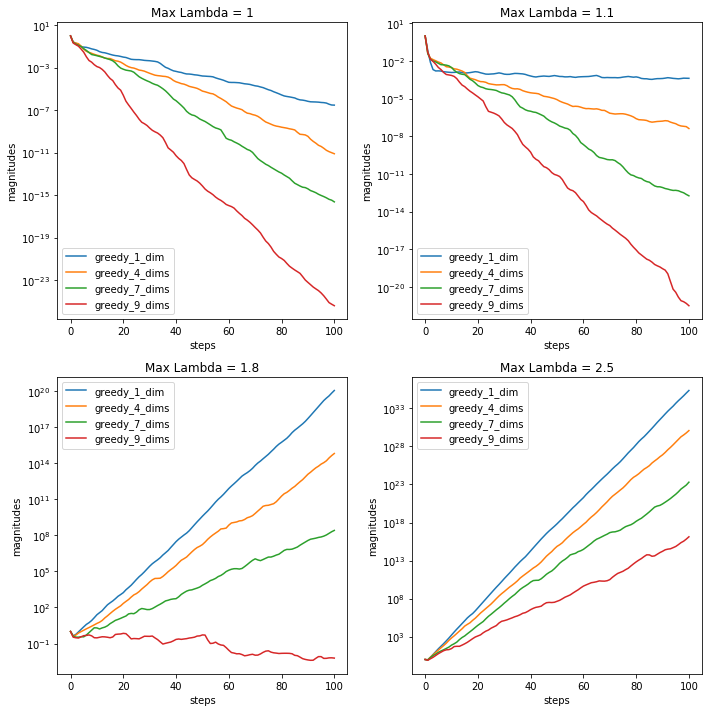

In [98]:
# Effect of more dimensions on growth / decay
N = 10

lambdas = [1, 1.1, 1.8, 2.5]
for i, max_lambda in enumerate(lambdas):
    A = make_diagonal_matrix(N, max_lambda, 0.1)
    x0 = make_random_direction(N)
    plt.subplot(math.ceil(len(lambdas) / 2), 2, i + 1)
    plt.title(f"Max Lambda = {max_lambda}")
    plot_magnitude_decay(
        greedy_1_dim=single_test(greedy, A, x0, 100, 1)["states"],   
        greedy_4_dims=single_test(greedy, A, x0, 100, 2)["states"],
        greedy_7_dims=single_test(greedy, A, x0, 100, 3)["states"],
        greedy_9_dims=single_test(greedy, A, x0, 100, 4)["states"],
    )

plt.tight_layout()
plt.legend()
plt.show()

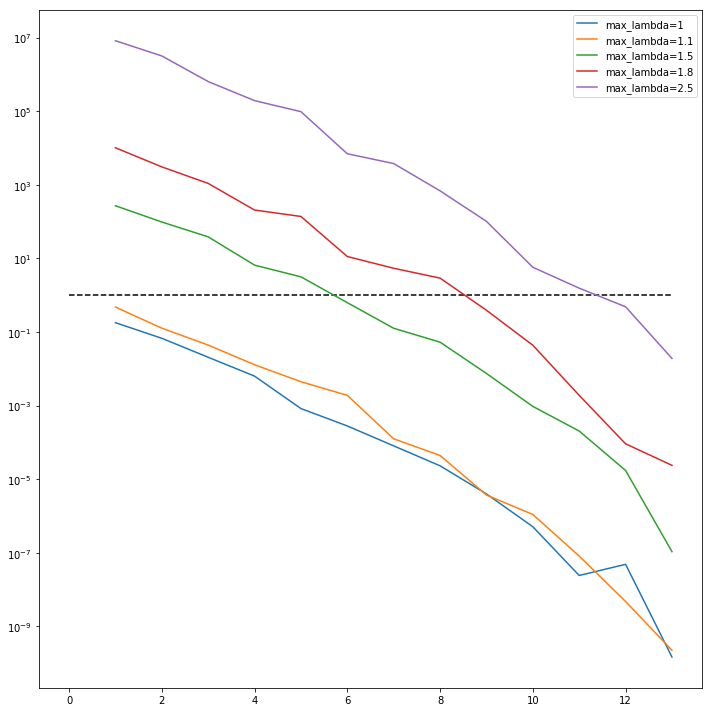

In [99]:
# Effect of max eigenvalue on minimum number of dimensions needed to ensure stability
N = 20
trials = 3

max_dims = 13

lambdas = [1, 1.1, 1.5, 1.8, 2.5]
for i, max_lambda in enumerate(lambdas):
    A = make_diagonal_matrix(N, max_lambda, 0.1)
    x0 = make_random_direction(N)
    scalings = []
    for dims in range(1, max_dims+1):
        scaling_sum = 0
        for trial in range(trials):
            states = single_test(greedy, A, x0, 20, dims)["states"]
            scaling_sum += np.linalg.norm(states[-1])
        scalings.append(scaling_sum / trials)
    plt.plot(range(1, max_dims+1), scalings, label=f"max_lambda={max_lambda}")

plt.hlines(y=1, xmin=0, xmax=max_dims, linestyle="dashed")
    
plt.yscale("log")
plt.tight_layout()
plt.legend()
plt.show()

In [1]:
""" 
Assume that the main eigenvector dominates. 
Assume that this eigenvector lies in the span of the measurements made so far, and use least squares to compute it
Also need to determine the value of lambda
"""
def make_least_squares():
    def strategy():
        

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-0f565924a787>, line 6)